## Know your Python lists

* 

* 

* 

In [9]:
# Brute Force Approach

# Time Complexity: O(n^2)
# Space Complexity: O(1)


def good_pair(a, b):
    """
    Two-Sum problem:
    
    Given an array A and an integer B. A Pair(i, j) in the array is a good pair, 
    
    if i != j and A[i] + A[j] == B. 
    
    Check if any good pair exist or not.
    
    Args:
        [list]a
        [int]b
    
    """
    for i in a:
        for j in a:
            if i != j and i + j == b:
                return True
    return False

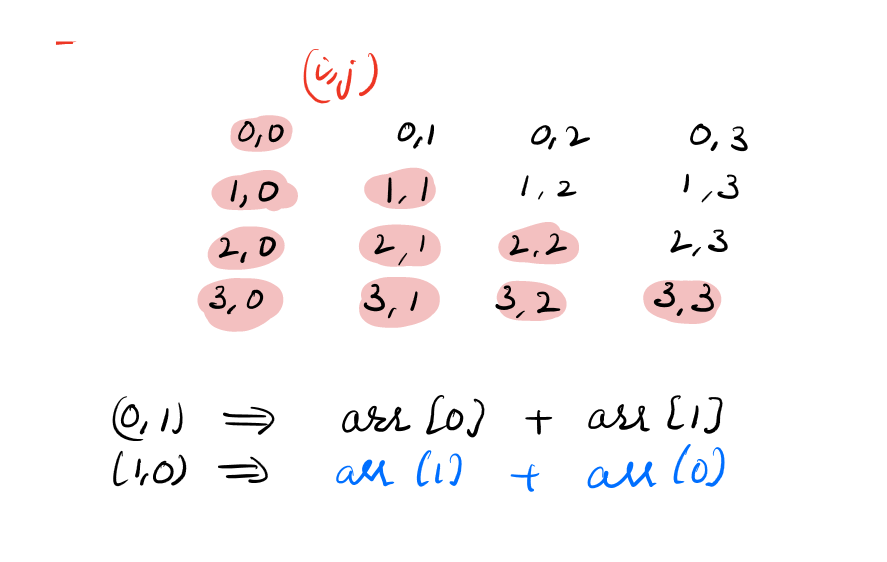



```
x = (0, 1) = A[i] + A[j]

y = (1, 0) = A[i] + A[j]
```

* All the highlighted parts in the table have the similar property where `x = y`

* Since value like `(0, 1)` and `(1, 0)` would give the same result, we can probably calculate it only once.

* All the other elements in the table have a property where `j = i + 1` like `(0,1)`, `(1,2)`, `(2,3)` etc

In [21]:
# Optimised Approach

def good_pair(a, b):
    """
    Two-Sum problem:
    
    Given an array A and an integer B. A Pair(i, j) in the array is a good pair, 
    
    if i != j and A[i] + A[j] == B. 
    
    Check if any good pair exist or not.
    
    Args:
        [list]a
        [int]b
    
    """
    for i in range(len(a)):
        # Iterate on unique sum of pairs 
        for j in range(i+1, len(a)):
            if a[i] + a[j] == b:
                return True
    return False


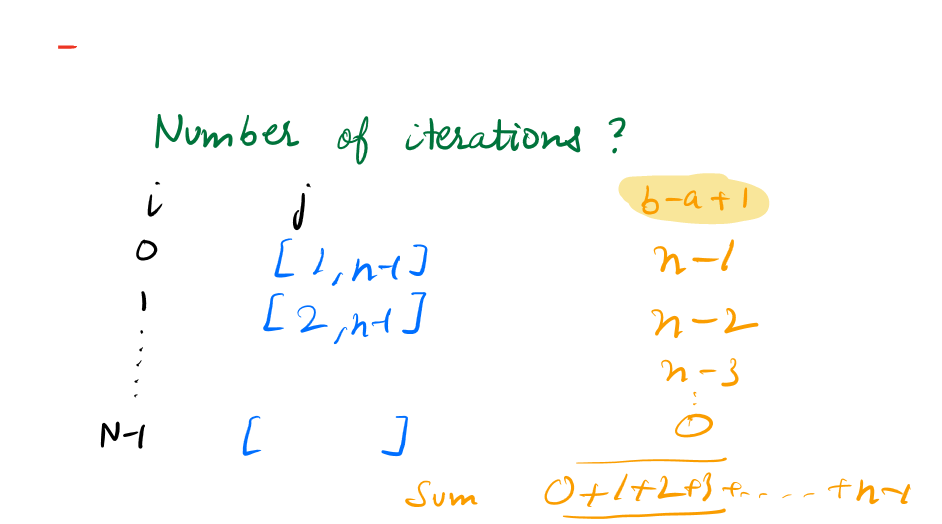


* When `i` is `0` the range of `j` would be `[1,n-1]`

* When `i` is `1` the range of `j` would be `[2,n-1]`

* Similarly for `n-1` there would be no `j` 

* If we see the total sum, it is the same as sum of all natural number till `n-1`  


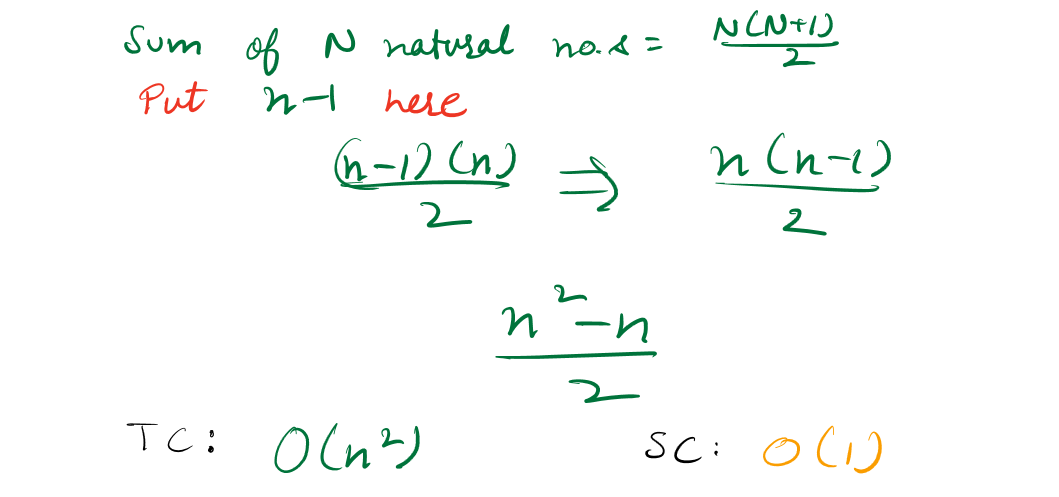



* Even though the number of iterations `(n^2-n)/2` are almost half but still the time complexity is `O(n^2)`. Which shows the time complexity sometimes can be flawed. 

* `Hashing` can help us solve this problem in `O(n)` time.

In [29]:
# Time Complexity: O(n)
# Space Complexity: O(1)

def reverse(a):
    """
    Given an integer list reverse the entire list with the space
    complexity of O(1) i.e not taking an extra space. 
    
    
    Args:
        [list]a: list of integer array
    
    Output:
        [list]: Reversed array
    """
    i, j = 0, len(a) - 1
    
    while i < j:
        a[i], a[j] = a[j], a[i]
        i += 1
        j -= 1
    return a    

In [34]:
# Time Complexity: O(n)
# Space Complexity: O(1)

def reverse_part(a, start_index, end_index):
    """
    Reverse the part of the list starting at index (s, e)
    
    Args:
        [list]a
        [int]s: start index
        [int]e: end index
    
    Output:
        [list]a: List with element reversed at (s, e)
    """
    i, j = start_index, end_index
    
    while i < j:
        a[i], a[j] = a[j], a[i]
        i += 1
        j -= 1
    return a

* Given an array rotate the array from first to last k times i.e first element goes to the last elements place.

```
a = [3, 2, 1, 4, 6, 9, 8]
    
For k=1, a = [8, 3, 2, 1, 4, 6, 9]
For k=2, a = [9, 8, 3, 2, 1, 4, 6]
For k=3, a = [6, 9, 8, 3, 2, 1, 4]
```

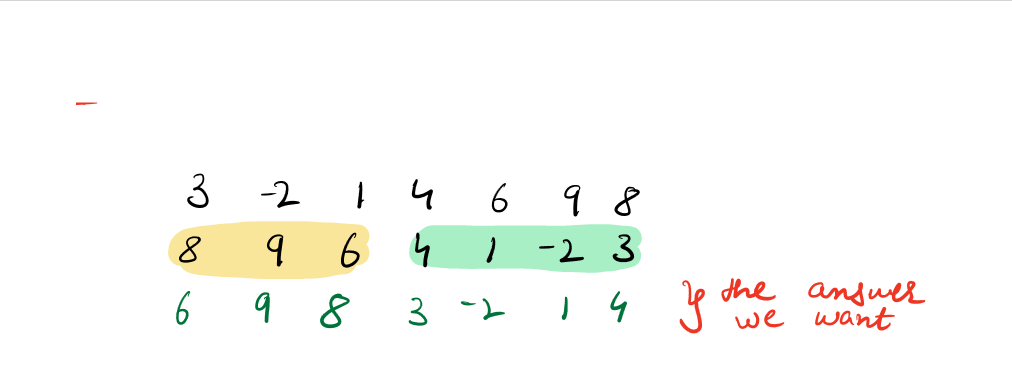

* A good aproach here can be to reverse the full array first that would give reversed list in a jumbled manner.
* Now we can break the array in two part `(0-k-1)` and `(k, len(a)-1)`.
* Two get the result we want we can reverse these two parts again.

In [55]:
# Time Complexity: O(n)
# Space Complexity: O(1)

def rotate_k_times(a, k):
    """
    Given an array rotate the array from last to first k times.
    
    Args:
        [list] a
        [int] k
    
    Output:
        [list]: rotated list
    """
    # Reduce the number of rotation.
    k=k%n
    reverse(a)
    reverse_part(a, 0, k-1)
    reverse_part(a, k, len(a) - 1)
    return a


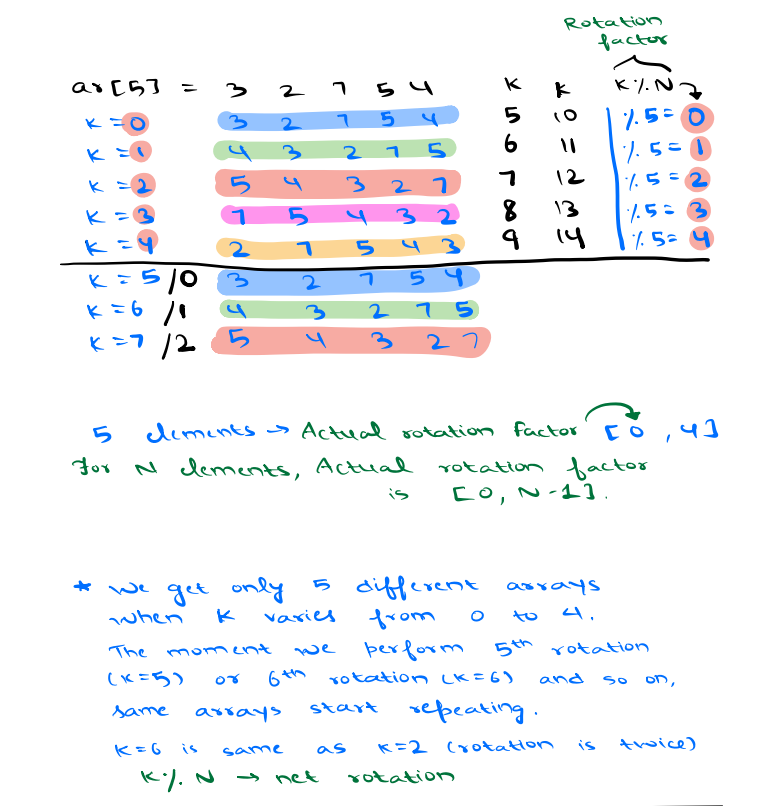



* If we want to rotate the given array `a` to `4` times.

```
>>> a = [3, 1, 2]
>>> rotate_k_times(a, 4)
```

* The rotation would happen something like 

```
k = 1, [3, 1, 2]
k = 2, [2, 3, 1]
k = 3, [1, 2, 3]
k = 4, [3, 1, 2]
```
* By the above observation we can say `k = 1` is the same as `k = 4`

* Thus to optmise out code a bit we can reduce the number of rotations like `k = k % n`, for `rotate_k_times([3, 1, 2], 4)` `k` would actually be `k = 4%3 = 1`


In [66]:
# Brute Force
# ===========
# Find max element of array instead of min element. 
# And Count the number of elements present in the array that are not equal to maxelement. 
# That count will be the answer.

def count_elements(A):
    """
    Given an array A of N integers. 
    Count the number of elements that have at least 1 elements greater than itself.

    A = [3, 1, 2]
    Output -> 2
    The elements that have at least 1 element greater than itself are 1 and 2


    Args:
        [list]A: list to be searched upon

    Output:
        [int]Count: Count of element

    """
    max_number = -float("inf")
    numbers = set(A)
    for num in numbers:
        if num > max_number:
            max_number = num

    count = 0
    for number in A:
        # The values that are equal to max elements are only elements 
        # that have no greater element present inside array.
        if number < max_number:
            count += 1

    return count

A = [ 3, 5, 3, 2, 9, 3, 10, 10, 10, 3 ]
count_elements(A)

7

In [68]:
# Better Approach
# ===========
# Iterate though the list and find the max_value and the max_count
# max_count would store value of repeated value of max_value.
# len(A) - max_count would give that have atleast one greater element
# than itself.
# Not taking max_value because:
# The values that are equal to max elements are only elements 
# that have no greater element present inside array.

def _count_elements(A):
    max_value = -float("inf")
    max_count = 0
    for number in A:
        if number == max_value:
            max_count += 1
        elif number > max_value:
            max_count = 1
            max_value = number

    return len(A) - max_count

A = [ 3, 5, 3, 2, 9, 3, 10, 10, 10, 3 ]
_count_elements(A)

7

In [67]:
A = [ 3, 5, 3, 2, 9, 3, 10, 10, 10, 3 ]
count_elements(A) == _count_elements(A)

True

In [56]:
# Time Complexity: O(n)
# Space Complexity: O(1)


def time_to_equality(A):
    """
    Given an integer array A of size N. In one second, you can increase 
    the value of one element by 1.

    Find the minimum time in seconds to make all elements of the array equal.
    
    A = [2, 4, 1, 3, 2]
    Output -> 8
    
    We can change the array A = [4, 4, 4, 4, 4]. 
    The time required will be 8 seconds.
    
    Args:
        [list]A: list to be searched upon

    Output:
        [int]Count: Count to equality
    """
    a = -1
    count = 0
        
    # Get the largeset element in the list
    for i in A:
        if i > a:
            a = i
        
    # Count to equality i.e largest number - number
    # would give the difference between the number.
    for i in A:
        if i != a:
            count = count + (a - i)
    return count

In [103]:
# Time Complexity: O(n)
# Space Complexity: O(1)

def max_min(a):
    """
    Given an array A of size N. 
    You need to find the sum of Maximum and Minimum element in the given array.
    
    Args:
        [list]a
        
    Output:
        [int]: Sum of max and min number.
    """
    min_number,  max_number  = float("inf"), -float("inf")
    
    for i in a:
        if i > max_number:
            max_number = i
        # Even if you move this check to the second loop
        # it would be O(n) + O(n) = O(n)
        if i < min_number:
            min_number = i
    

    return max_number + min_number

In [107]:
# Time Complexity:
# Space Complexity:

def range_sum_query(a, b):
    """
    You are given an integer array A of length N.
    You are also given a 2D integer array B with dimensions M x 2, where each row denotes a [L, R] query.
    For each query, you have to find the sum of all elements from L to R indices in A (0 - indexed).
    More formally, find A[L] + A[L + 1] + A[L + 2] +... + A[R - 1] + A[R] for each query.
    
    A = [1, 2, 3, 4, 5]
    B = [[0, 3], [1, 2]]
    

    The sum of all elements of A[0 ... 3] = 1 + 2 + 3 + 4 = 10.
    The sum of all elements of A[1 ... 2] = 2 + 3 = 5.
    Result: [10, 5]
    
    Args:
        [list]a
        
    Output:
        [list]: Sum of the range
    """
    ...

In [21]:
def is_perfect_number(a):
    """
    You are given an integer A. You have to tell whether it is a perfect number or not.

    Perfect number is a positive integer which is equal to the sum of its proper positive divisors.

    A proper divisor of a natural number is the divisor that is strictly less than the number.
    
    
    For A = 6, the sum of its proper divisors = 1 + 2 + 3 = 6, is equal to 6. 
    
    
    Args:
        [int]a
    
    Output:
        [bool]
    """
    sum_n = 0
    num = a

    if a == 1:
        return False

    while(a > 0):
        if a != num and num % a == 0:
            sum_n += a
        a = a - 1
    return bool(sum_n == num)


is_perfect_number(6)

True

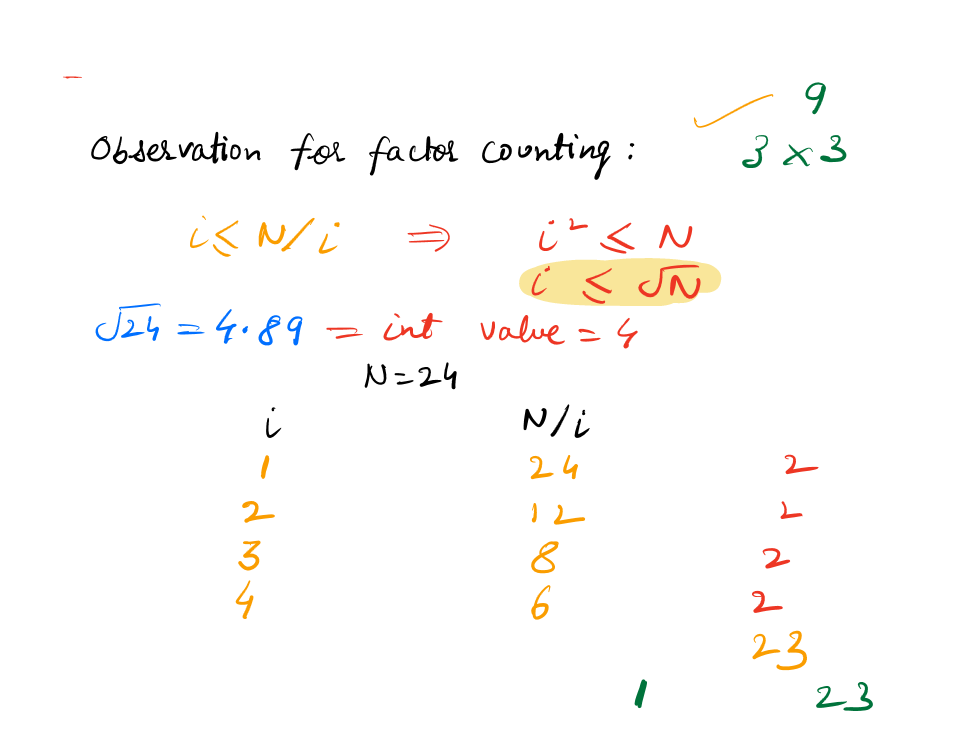

In [31]:
from math import sqrt


def is_prime(number):
    """
    To check if a number (N) is prime we can check if it's a prime if we
    check all the values from i to floor(sqrt(N)). 

    We don't have to iterate all the way from i to N.
    
    Args:
        [int]number
        
    Output:
        [bool]
    """
    if number==1: return False
    # Taking floor of sqrt(number)
    for i in range(2, int(sqrt(number)+1)):
        if number % i == 0: 
            return False
    return True



def count_of_prime(a):
    """
    You will be given an integer n. You need to return the count of prime numbers less than or equal to n.
    
    Input: 19
    
    Output: 8
    
    Primes <= 19 are 2, 3, 5, 7, 11, 13, 17, 19
    
    Args:
        [int]a
    
    Output:
        [int] count of primes for a
    """
    count = 0

    while(a > 0):
        if is_prime(a):
            count += 1
        a = a - 1
    return count

In [30]:
count_of_prime(19)

8

* Given two integers A and B. A represents the count of mangoes and B represent the count of slices of mangoes. 

* Mango can be cut into three slices of mangoes. A glass of mango shake can be formed by two slices of mangoes.

> Find the maximum number of glasses of mango shakes you can make with A mangoes and B slices of mangoes initially.


```Python
Input:
    A = 19
    B = 0
Output: 28

Input:
    A = 7
    B = 1
Output: 11
```

In [41]:
def make_it(a, b):
    """
    Args:
        [int]a
        [int]b
    
    Output:
        [int]: Count of total milk shakes
    """
    total_mango_shakes = 0
    
    # total monago a can be converted a 3 multiple of slices.
    total_slices = (3*a) + b
    
    if total_slices % 2 == 0:
        total_mango_shakes = total_slices/2
    else:
        total_mango_shakes = (total_slices-1)/2
    
    return int(total_mango_shakes)

In [40]:
make_it(7, 1)

11